In [1]:
#Imports
import pandas as pd
import yfinance as yf
import os


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error

In [ ]:
btc_ticker = yf.Ticker("BTC-USD") #Price of bitcoin relativ to the USD
btc = btc_ticker.history(period="max") #Gather the price som start to today
btc 

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2025-11-01 00:00:00+00:00,109558.625000,110574.898438,109372.953125,110064.015625,25871668762,0.0,0.0
2025-11-02 00:00:00+00:00,110064.429688,111167.312500,109523.453125,110639.625000,34284209459,0.0,0.0
2025-11-03 00:00:00+00:00,110646.906250,110764.914062,105336.359375,106547.523438,72852006359,0.0,0.0


In [ ]:
btc.index = pd.to_datetime(btc.index)#Convert to datetime to make it easier to work with

In [ ]:
del btc["Dividends"]
del btc["Stock Splits"]

<Axes: xlabel='Date'>

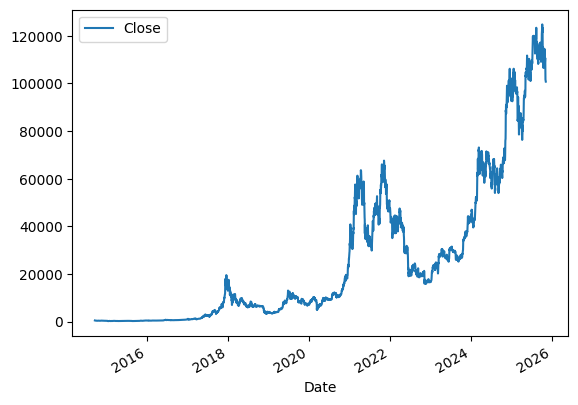

In [4]:
btc.plot.line(y="Close", use_index=True)